In [32]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score,
                             roc_auc_score, roc_curve, precision_score, recall_score, f1_score)
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the dataset
file_path = 'labeled_data.csv'  # Update with the correct file path
df = pd.read_csv(file_path)


In [3]:
# Drop the unnamed column
df = df.drop(df.columns[0], axis=1)

# Basic dataset statistics
print("Dataset Overview:")
print(df.describe())



Dataset Overview:
              count   hate_speech  offensive_language       neither  \
count  24783.000000  24783.000000        24783.000000  24783.000000   
mean       3.243473      0.280515            2.413711      0.549247   
std        0.883060      0.631851            1.399459      1.113299   
min        3.000000      0.000000            0.000000      0.000000   
25%        3.000000      0.000000            2.000000      0.000000   
50%        3.000000      0.000000            3.000000      0.000000   
75%        3.000000      0.000000            3.000000      0.000000   
max        9.000000      7.000000            9.000000      9.000000   

              class  
count  24783.000000  
mean       1.110277  
std        0.462089  
min        0.000000  
25%        1.000000  
50%        1.000000  
75%        1.000000  
max        2.000000  


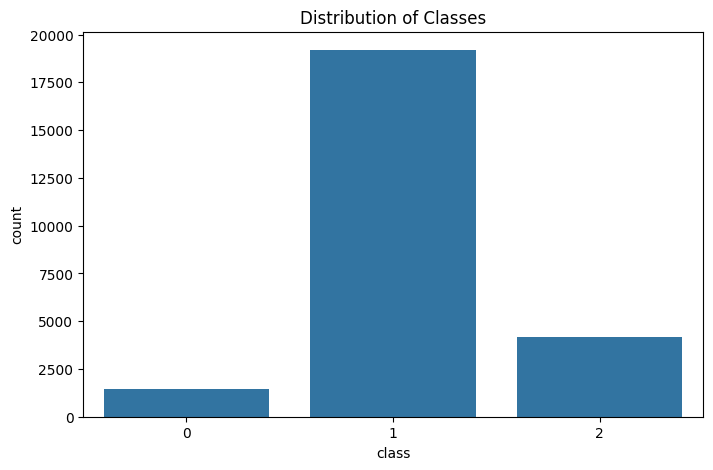

In [4]:
# Encode the target labels
label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])

# Visualize the distribution of classes
plt.figure(figsize=(8, 5))
sns.countplot(x='class', data=df)
plt.title('Distribution of Classes')
plt.show()



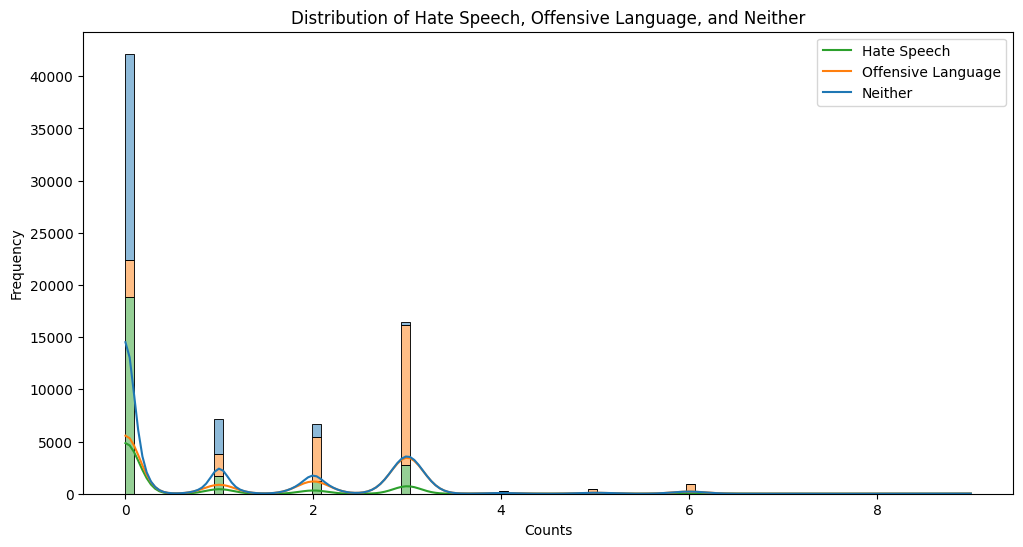

In [6]:
# Plot the distribution of hate speech, offensive language, and neither
plt.figure(figsize=(12, 6))
sns.histplot(df[['hate_speech', 'offensive_language', 'neither']], kde=True, multiple='stack')
plt.title('Distribution of Hate Speech, Offensive Language, and Neither')
plt.xlabel('Counts')
plt.ylabel('Frequency')
plt.legend(['Hate Speech', 'Offensive Language', 'Neither'])
plt.show()



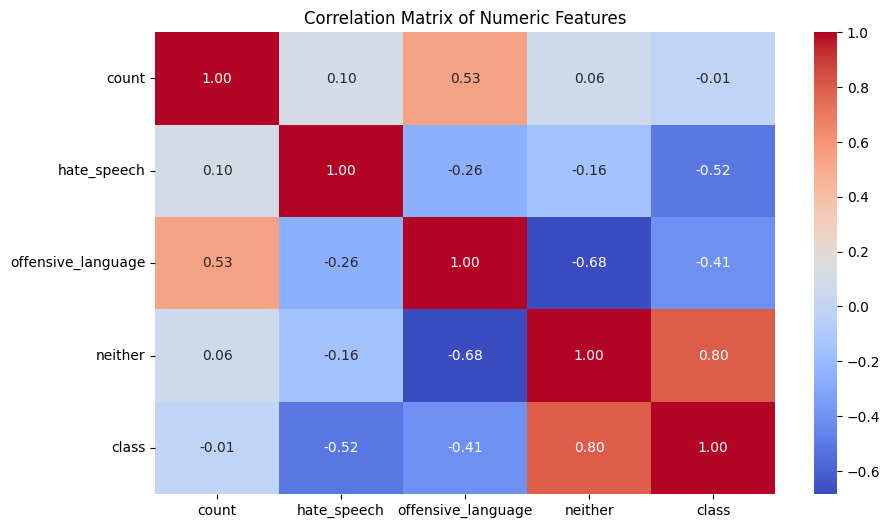

In [8]:
# Correlation Matrix for numeric columns only
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.show()


In [9]:
# Text preprocessing
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X = tfidf.fit_transform(df['tweet'])
y = df['class']


In [22]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [37]:
def evaluate_model(y_test, y_pred, y_prob, model_name):
    print(f"Results for {model_name}:\n")

    # Check for empty inputs
    if len(y_test) == 0 or len(y_pred) == 0 or len(y_prob) == 0:
        print("Error: One or more inputs are empty.")
        return

    # Debugging lengths
    print("y_test length:", len(y_test))
    print("y_pred length:", len(y_pred))
    print("y_prob length:", len(y_prob))

    # Print the first few elements
    print("y_test (first 5):", y_test[:5])  # No need for .values
    print("y_pred (first 5):", y_pred[:5])
    print("y_prob (first 5):", y_prob[:5])

    # Print classification report
    try:
        report = classification_report(y_test, y_pred)
        print(report)  # Display classification report
    except Exception as e:
        print(f"Error generating classification report: {e}")
        return

    # Calculate and print metrics
    try:
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

        # Print metrics
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")

        # Calculate ROC AUC score
        roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
        print(f"ROC AUC: {roc_auc:.4f}\n")
    except Exception as e:
        print(f"Error calculating metrics: {e}")


In [35]:
# Support Vector Machine (SVM)
svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
y_prob_svm = svm.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class


In [39]:
# Evaluate SVM
evaluate_model(y_test, y_pred_svm, y_prob_svm, 'Support Vector Machine')


Results for Support Vector Machine:

y_test length: 7435
y_pred length: 7435
y_prob length: 7435
y_test (first 5): 2281     1
15914    1
18943    2
16407    1
13326    1
Name: class, dtype: int64
y_pred (first 5): [1 1 1 1 1]
y_prob (first 5): [0.96803605 0.96785574 0.90664605 0.9320363  0.98280441]
              precision    recall  f1-score   support

           0       0.56      0.08      0.14       427
           1       0.91      0.97      0.94      5747
           2       0.85      0.85      0.85      1261

    accuracy                           0.90      7435
   macro avg       0.77      0.63      0.64      7435
weighted avg       0.88      0.90      0.88      7435

Accuracy: 0.8982
Precision: 0.8807
Recall: 0.8982
F1 Score: 0.8784
Error calculating metrics: axis 1 is out of bounds for array of dimension 1


In [40]:
# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
y_prob_nb = nb.predict_proba(X_test)[:, 1]

In [41]:

# Evaluate Naive Bayes
evaluate_model(y_test.values, y_pred_nb, y_prob_nb, 'Naive Bayes')

Results for Naive Bayes:

y_test length: 7435
y_pred length: 7435
y_prob length: 7435
y_test (first 5): [1 1 2 1 1]
y_pred (first 5): [1 1 1 1 1]
y_prob (first 5): [0.97647156 0.99376136 0.91364383 0.85017542 0.98969263]
              precision    recall  f1-score   support

           0       0.50      0.00      0.01       427
           1       0.83      0.99      0.91      5747
           2       0.88      0.42      0.57      1261

    accuracy                           0.84      7435
   macro avg       0.74      0.47      0.50      7435
weighted avg       0.82      0.84      0.80      7435

Accuracy: 0.8385
Precision: 0.8238
Recall: 0.8385
F1 Score: 0.7980
Error calculating metrics: axis 1 is out of bounds for array of dimension 1


In [42]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Evaluate Random Forest
evaluate_model(y_test.values, y_pred_rf, y_prob_rf, 'Random Forest')

Results for Random Forest:

y_test length: 7435
y_pred length: 7435
y_prob length: 7435
y_test (first 5): [1 1 2 1 1]
y_pred (first 5): [1 1 1 1 1]
y_prob (first 5): [1.   0.98 0.82 0.84 0.93]
              precision    recall  f1-score   support

           0       0.54      0.15      0.24       427
           1       0.92      0.96      0.94      5747
           2       0.82      0.88      0.85      1261

    accuracy                           0.90      7435
   macro avg       0.76      0.66      0.68      7435
weighted avg       0.88      0.90      0.88      7435

Accuracy: 0.8979
Precision: 0.8835
Recall: 0.8979
F1 Score: 0.8841
Error calculating metrics: axis 1 is out of bounds for array of dimension 1


In [44]:
# Cross-validation scores for model comparison
models = {
    'Support Vector Machine': SVC(probability=True),
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}
for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f'{model_name} Cross-Validation Accuracy: {np.mean(scores):.4f} ± {np.std(scores):.4f}')


Support Vector Machine Cross-Validation Accuracy: 0.9021 ± 0.0065
Naive Bayes Cross-Validation Accuracy: 0.8416 ± 0.0062
Random Forest Cross-Validation Accuracy: 0.9006 ± 0.0091


In [48]:
cv_results = {
    'Model': [],
    'Accuracy': []
}

# Evaluate each model and store the cross-validation scores
for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    cv_results['Model'].extend([model_name] * len(scores))
    cv_results['Accuracy'].extend(scores)
    print(f'{model_name} Cross-Validation Accuracy: {np.mean(scores):.4f} ± {np.std(scores):.4f}')

# Create a DataFrame for the results
cv_results_df = pd.DataFrame(cv_results)

Support Vector Machine Cross-Validation Accuracy: 0.9021 ± 0.0065
Naive Bayes Cross-Validation Accuracy: 0.8416 ± 0.0062
Random Forest Cross-Validation Accuracy: 0.9001 ± 0.0085


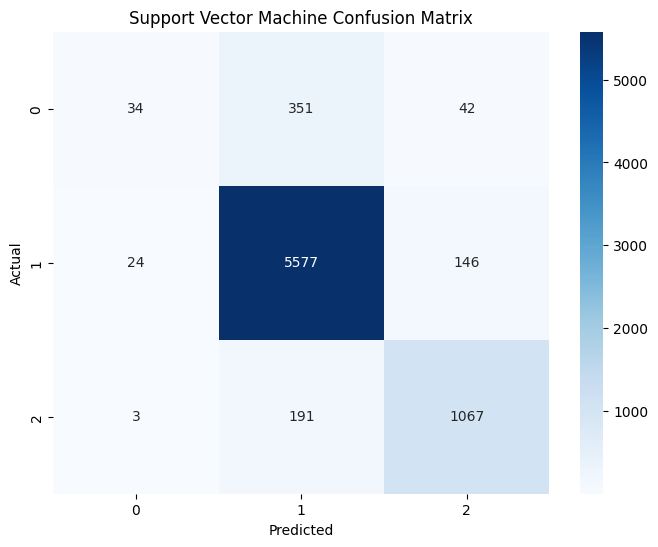

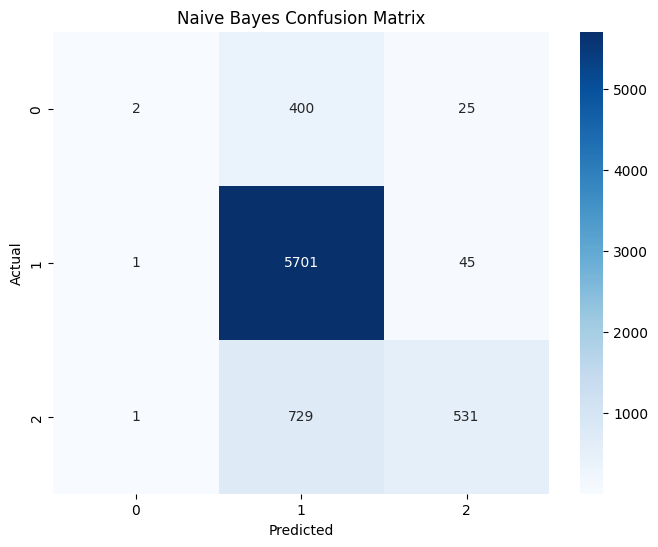

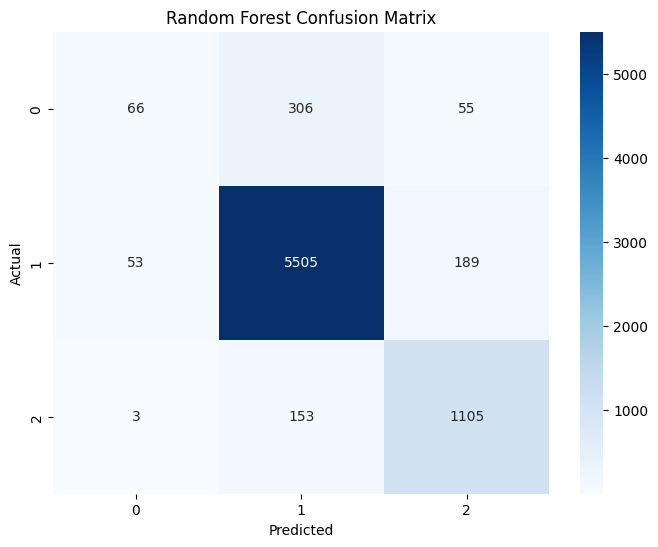

In [55]:
# Evaluate and plot confusion matrices for each model

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))  # Set figure size
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                 xticklabels=label_encoder.classes_,
                 yticklabels=label_encoder.classes_)  # Create heatmap for confusion matrix
    plt.title(f'{model_name} Confusion Matrix')  # Set title
    plt.ylabel('Actual')  # Set y-axis label
    plt.xlabel('Predicted')  # Set x-axis label
    plt.show()  # Display the confusion matrix

# Plot confusion matrices for each model
plot_confusion_matrix(y_test, y_pred_svm, 'Support Vector Machine')  # Confusion matrix for SVM
plot_confusion_matrix(y_test, y_pred_nb, 'Naive Bayes')  # Confusion matrix for Naive Bayes
plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest')  # Confusion matrix for Random Forest


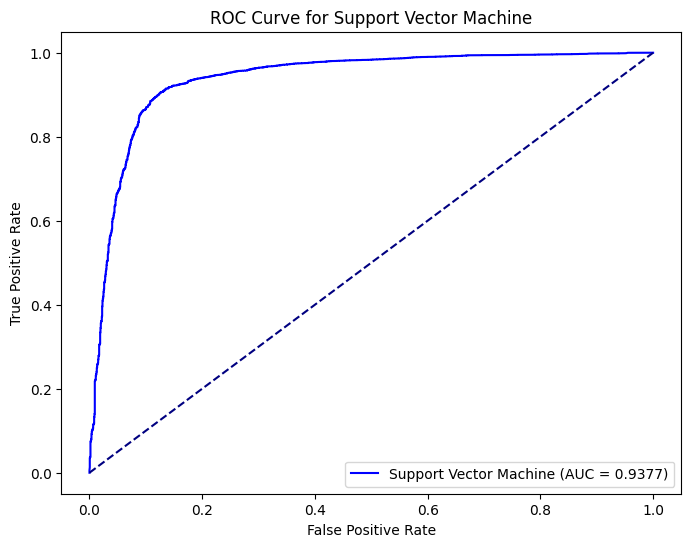

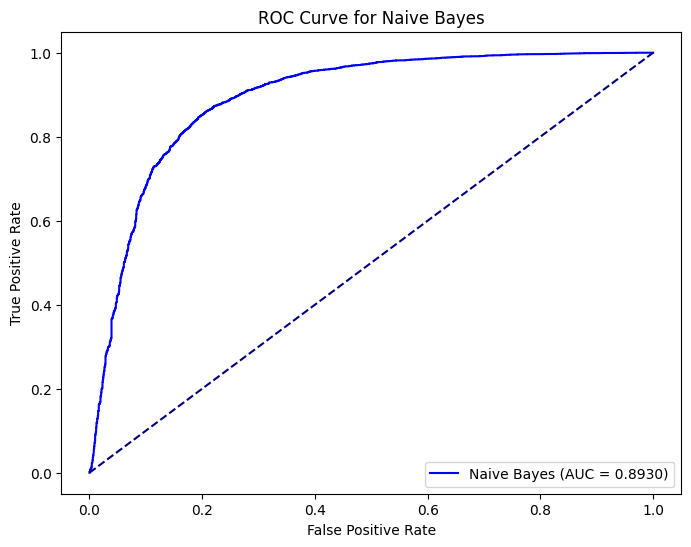

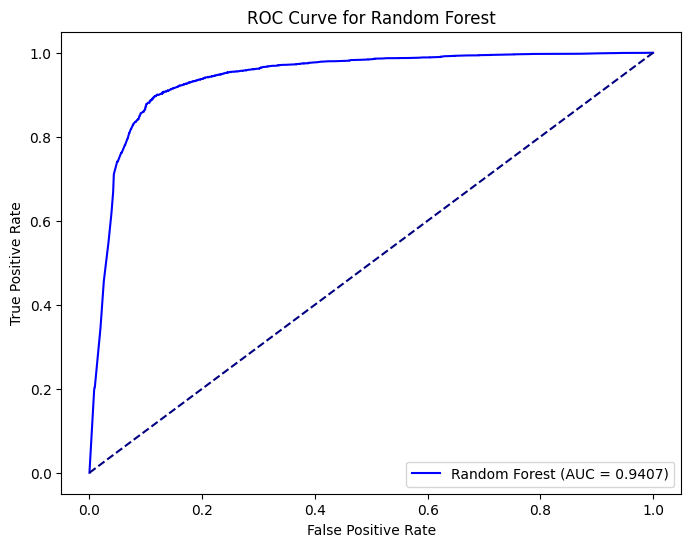

In [56]:
from sklearn.metrics import roc_curve, auc

# Function to plot ROC curve
def plot_roc_curve(y_test, y_prob, model_name):
    # Calculate the false positive rate and true positive rate
    fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=1)  # Use the positive class label
    roc_auc = auc(fpr, tpr)  # Calculate the AUC score

    plt.figure(figsize=(8, 6))  # Set figure size
    plt.plot(fpr, tpr, color='blue', label=f'{model_name} (AUC = {roc_auc:.4f})')  # Plot ROC curve
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line for random chance
    plt.xlabel('False Positive Rate')  # Set x-axis label
    plt.ylabel('True Positive Rate')  # Set y-axis label
    plt.title(f'ROC Curve for {model_name}')  # Set title
    plt.legend(loc='lower right')  # Show legend
    plt.show()  # Display the ROC curve

# Plot ROC curves for each model
plot_roc_curve(y_test, y_prob_svm, 'Support Vector Machine')  # ROC curve for SVM
plot_roc_curve(y_test, y_prob_nb, 'Naive Bayes')  # ROC curve for Naive Bayes
plot_roc_curve(y_test, y_prob_rf, 'Random Forest')  # ROC curve for Random Forest


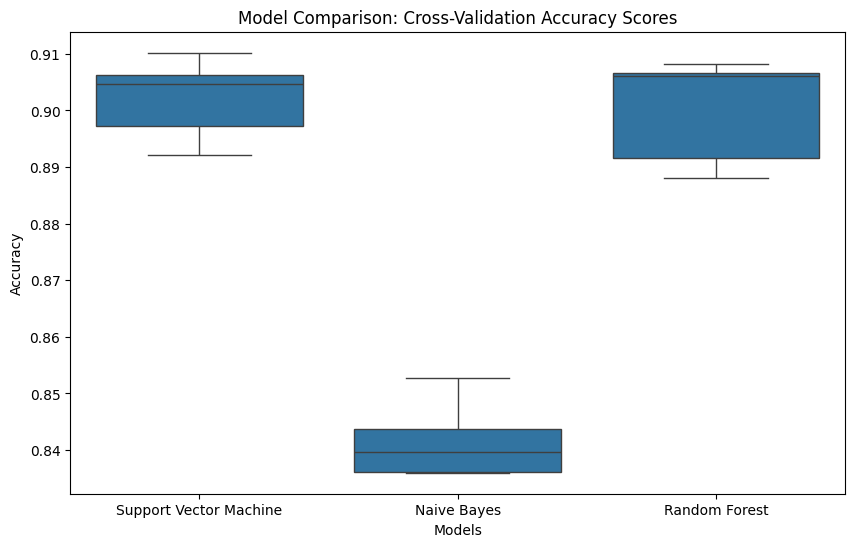

In [49]:
# Boxplot for model comparison
plt.figure(figsize=(10, 6))
sns.boxplot(x='Model', y='Accuracy', data=cv_results_df)
plt.title('Model Comparison: Cross-Validation Accuracy Scores')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

In [52]:
# Additional Statistical Analysis
print("Additional Statistical Analysis:")
print("Mean Accuracy of Models: ", np.mean(model_scores))
print("Standard Deviation of Accuracy Scores: ", np.std(model_scores))
print("Variance of Accuracy Scores: ", np.var(model_scores))

Additional Statistical Analysis:
Mean Accuracy of Models:  0.8781887469177314
Standard Deviation of Accuracy Scores:  0.028087935290136177
Variance of Accuracy Scores:  0.0007889321088628772
